# Part 1: Data Cleaning & Feature Engineering


In [1]:
# Package Loading
import json
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from collections import Counter

# Avoid all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to the drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
DATA_PATH = "./yelp_dataset"
FEATURE_PATH = "./features"
TRANSFORMED_FEATURE_PATH = "./transformed_features"

In [4]:
!ls -l $DATA_PATH
!ls -l $FEATURE_PATH
!ls -l $TRANSFORMED_FEATURE_PATH

total 9073854
-rw------- 1 root root  118863795 Jan 19  2022 yelp_academic_dataset_business.json
-rw------- 1 root root  286958945 Jan 19  2022 yelp_academic_dataset_checkin.json
-rw------- 1 root root 5341868833 Jan 19  2022 yelp_academic_dataset_review.json
-rw------- 1 root root  180604475 Jan 19  2022 yelp_academic_dataset_tip.json
-rw------- 1 root root 3363329011 Jan 19  2022 yelp_academic_dataset_user.json
total 0
total 0


## I. Data Loading

In [5]:
# Business
data_file = open(os.path.join(DATA_PATH, 'yelp_academic_dataset_business.json'), 'r')
data = []
for line in data_file:
  data.append(json.loads(line))

business_df = pd.DataFrame(data)
data_file.close()

print(f"Dimensions of businesses: {business_df.shape}")
business_df.head()

Dimensions of businesses: (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
# User
data_file = open(os.path.join(DATA_PATH, 'yelp_academic_dataset_user.json'), 'r')
data = []
for line in data_file:
  data.append(json.loads(line))

user_df = pd.DataFrame(data)
data_file.close()

print(f"Dimensions of users: {user_df.shape}")
user_df.head()

Dimensions of users: (1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [7]:
# Review
data_file = open(os.path.join(DATA_PATH, 'yelp_academic_dataset_review.json'), 'r')
data = []
for line in data_file:
  data.append(json.loads(line))

review_df = pd.DataFrame(data)
data_file.close()

print(f"Dimensions of reviews: {review_df.shape}")
review_df.head()

Dimensions of reviews: (6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## II. EDA & Data Cleaning

### #1. Business

**TODO:**

1. Handle the `categories` column
  - Some idea: manually select some categories to be marked as "retaurants", some to be "shopping", and the others to be "other".
2. Handle the `attributes` column
  - Some idea: expand each attribute to a seperate column
3. Handle the columns related to location (i.e., `address`, `city`, `state`, `postal_code`, `latitude`, and `longitude`)


#### Categories

The business categories (e.g. `Restaurant`, `Hotels & Travel`) are in a list in the `categories` column.

In [8]:
categories_count = Counter()

for categories in business_df["categories"]:
  if categories is not None:
    categories_count.update(categories.split(", "))

# top100_categories = categories_count.most_common(100)
# top100_categories_df = pd.DataFrame(top100_categories, columns=["Category", "Count"])
# top100_categories_df.to_csv("top100_category_counts.csv")

print(f"Number of unique categories: {len(categories_count)}")


Number of unique categories: 1311


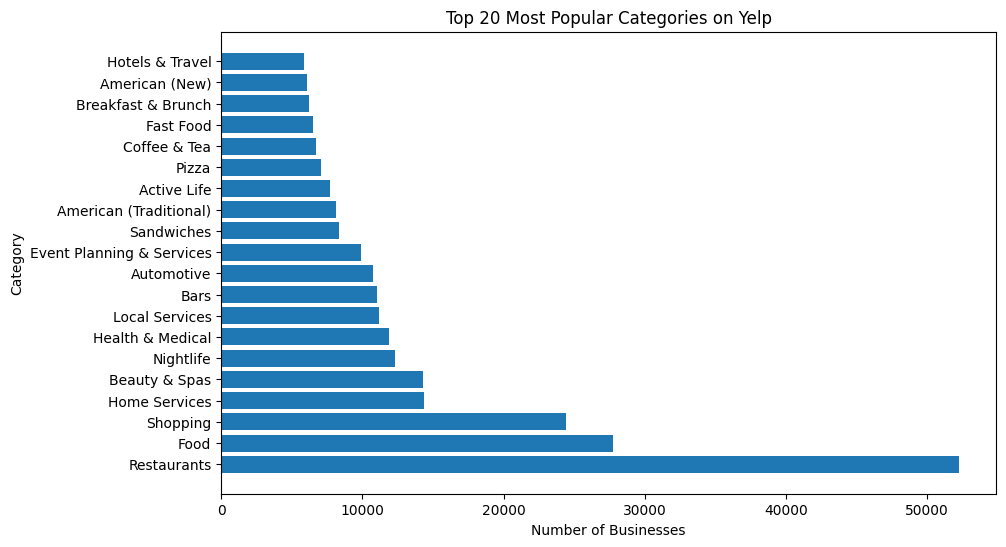

In [9]:
# Extract the top 20 categories
top_categories = [category for category, count in categories_count.most_common(20)]

# Get the counts for the top 20 categories
top_counts = [count for category, count in categories_count.most_common(20)]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_categories, top_counts)
plt.xlabel("Number of Businesses")
plt.ylabel("Category")
plt.title("Top 20 Most Popular Categories on Yelp")
plt.show()


There are 1311 unique categories in the dataset. As we are building a recommendation system for restaurants, we need to filter out the business that is not directly related to restaurants.

To be specific, we manually find the categories that we think is highly related to restaurants, and filter the businesses that contain one or more of those categories.



In [10]:
food_categories = [
    'Restaurants',
    'Food',
    'Bars',
    'Sandwiches',
    'American (Traditional)',
    'Pizza',
    'Coffee & Tea',
    'Fast Food',
    'Breakfast & Brunch',
    'American (New)',
    'Burgers',
    'Mexican',
    'Italian',
    'Specialty Food',
    'Seafood',
    'Chinese',
    'Bakeries',
    'Salad',
    'Chicken Wings',
    'Cafes',
    'Ice Cream & Frozen Yogurt',
    'Caterers',
    'Beer',
    'Wine & Spirits',
    'Delis',
    'Japanese',
    'Pubs',
    'Cocktail Bars',
    'Sushi Bars',
    'Barbeque',
    'Juice Bars & Smoothies',
    'Asian Fusion',
    'Diners',
]

In [11]:
# Only keep the restaurant businesses
def is_restaurant(x, food_categories):
  if x is not None:
    for category in x.split(", "):
      if category in food_categories:
        return True
  return False


restaurant_df = business_df[business_df["categories"].apply(lambda x: is_restaurant(x, food_categories))]

print(f"Dimensions of restaurants: {restaurant_df.shape}")
print(f"Percentage of restaurants: {restaurant_df.shape[0] / business_df.shape[0]:.4f}")

restaurant_df.head()


Dimensions of restaurants: (67070, 14)
Percentage of restaurants: 0.4461


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [12]:
missing_values_count = restaurant_df.isna().sum()
print(missing_values_count)

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       898
categories         0
hours           9904
dtype: int64


#### Attributes

As we are going to use the business dataset as the representation of each restaurant's feature, we need to have the columns to be either numerical value or categorical value for the feature engineering step. Let's examine the `attributes` column to see if there are some new columns that we can extract from.

In [13]:
unique_attributes = set()

def _count_unique_attributes(x):
  if x is not None:
    unique_attributes.update(x.keys())

restaurant_df['attributes'].apply(_count_unique_attributes)

print(f"Number of unique attributes: {len(unique_attributes)}")
print(unique_attributes)


Number of unique attributes: 39
{'GoodForDancing', 'BikeParking', 'RestaurantsPriceRange2', 'BestNights', 'RestaurantsTableService', 'BusinessParking', 'WiFi', 'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsDelivery', 'RestaurantsAttire', 'HasTV', 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'DietaryRestrictions', 'WheelchairAccessible', 'BYOB', 'RestaurantsTakeOut', 'HairSpecializesIn', 'Corkage', 'Ambience', 'BusinessAcceptsBitcoin', 'Open24Hours', 'HappyHour', 'RestaurantsCounterService', 'Music', 'AcceptsInsurance', 'Smoking', 'BYOBCorkage', 'AgesAllowed', 'GoodForKids', 'DriveThru', 'CoatCheck', 'GoodForMeal', 'OutdoorSeating', 'DogsAllowed', 'NoiseLevel', 'BusinessAcceptsCreditCards'}


There are 39 unique attributes. Our goal is to find the ones which we think could act as a feature and be helpful for the predictive model. Let's first take a look at the distribution of each attribute.

In [14]:
def examine_attribute(attribute):
  temp_df = restaurant_df[restaurant_df['attributes'].apply(lambda x: attribute in x.keys() if x is not None else False)]

  print("==================================")
  print(attribute)
  print(f"Number of restaurants with {attribute}: {temp_df.shape[0]}")
  print(f"Percentage of restaurants with {attribute}: {(temp_df.shape[0] / restaurant_df.shape[0]) * 100:.2f}%\n")
  temp_df[attribute] = temp_df["attributes"].apply(lambda x: x[attribute])
  print(temp_df[attribute].value_counts())

  return temp_df

In [15]:
for attribute in list(unique_attributes):
    examine_attribute(attribute)
    print("==================================")
    print()


GoodForDancing
Number of restaurants with GoodForDancing: 4471
Percentage of restaurants with GoodForDancing: 6.67%

GoodForDancing
False    3650
True      821
Name: count, dtype: int64

BikeParking
Number of restaurants with BikeParking: 45851
Percentage of restaurants with BikeParking: 68.36%

BikeParking
True     34260
False    11543
None        48
Name: count, dtype: int64

RestaurantsPriceRange2
Number of restaurants with RestaurantsPriceRange2: 56482
Percentage of restaurants with RestaurantsPriceRange2: 84.21%

RestaurantsPriceRange2
2       29502
1       24400
3        2269
4         292
None       19
Name: count, dtype: int64

BestNights
Number of restaurants with BestNights: 5520
Percentage of restaurants with BestNights: 8.23%

BestNights
{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}         925
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': True, 'sunday': 

As we see from the results, the attributes column is quite complicated. Some attributes are key-value pair data. Nonetheless, we can ignore the attributes that just a small portion of restaurants have (e.g., only 0.12% of restaurants have the `AcceptsInsurance` attribute). After removing such attributes, we have:

- **True/False Attributes** (these are the attributes can later be represent as 0/1):
  
  [
    `Caters`, `RestaurantsReservations`, `BikeParking`, `HasTV`, `RestaurantsTakeOut`, `BusinessAcceptsCreditCards`, `GoodForKids`, `RestaurantsDelivery`, `RestaurantsGoodForGroups`, `OutdoorSeating`
  ]

- **Ordinal Attributes** (these are the attributes having a natural order or ranking, which we can applied ordinal encoding in the feature engineering step)

  [
    `WiFi`, `RestaurantsPriceRange2`, `NoiseLevel`, `Alcohol`
  ]

- **The `GoodForMeal` Attribute**: this attribute describes which meal the restaurant is good for dining.
  - This includes ['dessert', 'latenight', 'lunch', 'dinner', 'brunch', 'breakfast']
  - However, it seems that most of the restaurants having the attribute are marked as all `False`. This attribute might not be a valid feature.

- **The `BusinessParking` Attribute**: this attribute the different parking options that the restaurant is marked to provide.
  - This includes ['garage', 'street', 'validated', 'lot', 'valet']
  - One naive method to encode this attribute is to construct a new 1/0 column for each of the parking option above.
  - Another feature engineering method that our team is thinking about is to construct a scoring function for this attribute, whereas more parking options the restaurant provides, the hight the score would be. This method requires future validation through model training and evaluation.

- **The `Ambience` Attribute**: this attribute contains some key-value pairs that describe what the restaurant "feels like".
  - This includes ['touristy', 'hipster', 'romantic', 'divey', 'intimate', 'trendy', 'upscale', 'classy', 'casual']
  - One naive encoding method is to construct a new 1/0 column for each of the aspect above.
  - Engineering this attribute requires further analysis of their individual distribution and the correlation of each aspect to the rating.


Above is a brief vision for what we can do with those attributes in the feature engineering step. Next, we can take a look at some attributes and see how the ratings differs given different values of the attribute.

WiFi
Number of restaurants with WiFi: 42908
Percentage of restaurants with WiFi: 63.97%

WiFi
u'free'    17261
u'no'      12244
'free'      6697
'no'        6369
u'paid'      192
'paid'       108
None          37
Name: count, dtype: int64

WiFi
0    3.556515
1    3.450000
2    3.613094
Name: stars, dtype: float64


<Axes: xlabel='WiFi', ylabel='stars'>

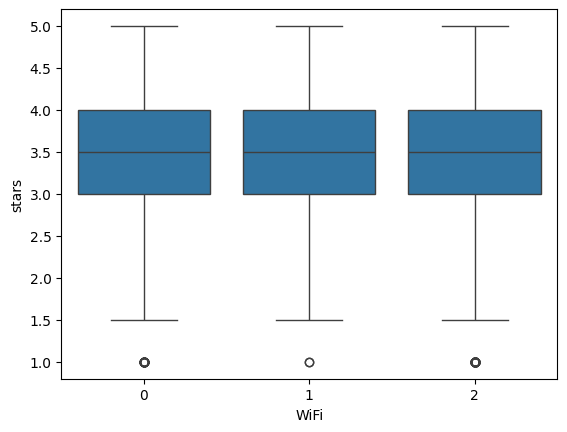

In [16]:
# WiFi
restaurant_df_wifi = examine_attribute("WiFi")
print()

def _clean_wifi(x):
  """
  Clean the WiFi attribute.

    2: free
    1: paid
    0: no/None
  """
  if x == "'no'" or x == "u'no'" or x is None:
    return 0
  if x == "'free'" or x == "u'free'":
    return 2
  if x == "'paid'" or x == "u'paid'":
    return 1
  else:
    return 0

restaurant_df_wifi["WiFi"] = restaurant_df_wifi["WiFi"].apply(_clean_wifi)
restaurant_df_wifi["WiFi"].value_counts()


print(restaurant_df_wifi.groupby("WiFi")["stars"].mean())

sns.boxplot(x="WiFi", y="stars", data=restaurant_df_wifi)

Although not obvioud in the graph, we can see from the numerical value that the restaurants with free wifi has slightly higher average rating stars compared to the other two.

RestaurantsReservations
Number of restaurants with RestaurantsReservations: 44984
Percentage of restaurants with RestaurantsReservations: 67.07%

RestaurantsReservations
False    29926
True     14784
None       274
Name: count, dtype: int64

RestaurantsReservations
0    3.428063
1    3.653950
Name: stars, dtype: float64


<Axes: xlabel='RestaurantsReservations', ylabel='stars'>

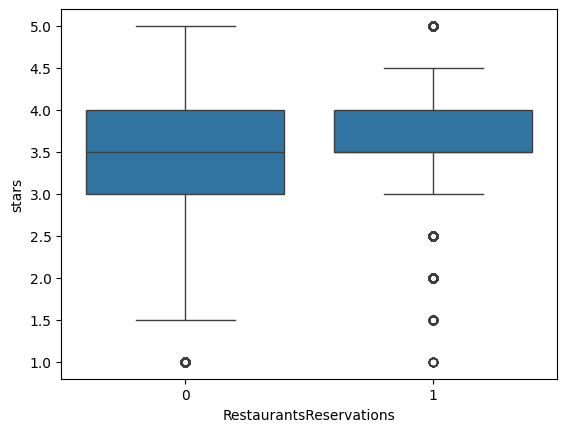

In [17]:
# RestaurantsReservations
restaurant_df_RestaurantsReservations = examine_attribute("RestaurantsReservations")
print()

def _clean_RestaurantsReservations(x):
  if x == 'True':
    return 1
  else:
    return 0

restaurant_df_RestaurantsReservations["RestaurantsReservations"] = restaurant_df_RestaurantsReservations["RestaurantsReservations"].apply(_clean_RestaurantsReservations)
restaurant_df_RestaurantsReservations["RestaurantsReservations"].value_counts()

print(restaurant_df_RestaurantsReservations.groupby("RestaurantsReservations")["stars"].mean())

sns.boxplot(x="RestaurantsReservations", y="stars", data=restaurant_df_RestaurantsReservations)

This is a more obvious example to show the distribute of the restaurant's stars over an attribute, RestaurantsReservations in this case. The plot illustrats that the restaurants with the reservation service tend to have hight stars.

These two examples are just a glimpse of the effect of attribute and how we can use them into our feature engineering step. In the later part of the project, we will examine the effect of each attribute and explore how different feature engineering techniques and different feature selection can affect the predictive model's performance.

### #2. User

In [18]:
missing_values_count = user_df.isna().sum()
print(missing_values_count)

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


#### Date related columns

In [19]:
# When the user joined Yelp
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'])

user_df['yelping_since'].describe()

count                          1987897
mean     2014-10-07 07:10:01.368328704
min                2004-10-12 08:46:11
25%                2012-06-30 17:12:57
50%                2014-10-12 15:09:56
75%                2016-11-26 01:12:32
max                2022-01-19 17:15:47
Name: yelping_since, dtype: object

In [20]:
# Join year
user_df['year'] = user_df['yelping_since'].dt.year

print(user_df['year'].value_counts())

year
2015    247850
2014    233465
2016    217620
2013    209762
2012    195955
2011    176435
2017    151024
2018    133568
2010    109054
2019    104655
2009     64911
2020     47444
2021     40485
2008     31097
2007     15340
2006      5423
2022      2782
2005       937
2004        90
Name: count, dtype: int64


In [21]:
# Age
user_df['age'] = 2022 - user_df['year']

print(user_df['age'].value_counts())

age
7     247850
8     233465
6     217620
9     209762
10    195955
11    176435
5     151024
4     133568
12    109054
3     104655
13     64911
2      47444
1      40485
14     31097
15     15340
16      5423
0       2782
17       937
18        90
Name: count, dtype: int64


#### Reviews related

In [22]:
user_df['review_count'].describe()

count    1.987897e+06
mean     2.339441e+01
std      8.256699e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.747300e+04
Name: review_count, dtype: float64

In [23]:
print(f"Number of users who do not have reviews:\
  {user_df[user_df['review_count']==0].shape[0]}")

user_df = user_df[user_df['review_count'] > 0]
print(user_df.shape)
user_df.head()

Number of users who do not have reviews:  54
(1987843, 24)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,year,age
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,56,18,232,844,467,467,239,180,2007,15
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,2009,13
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,17,3,66,96,119,119,35,18,2008,14
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,6,2,12,16,26,26,10,9,2005,17
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,1,1,0,0,0,0,2007,15


In [24]:
user_df['useful'].describe()

count    1.987843e+06
mean     4.229748e+01
std      6.414893e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      1.300000e+01
max      2.062960e+05
Name: useful, dtype: float64

In [25]:
user_df['funny'].describe()

count    1.987843e+06
mean     1.697100e+01
std      4.078090e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.858230e+05
Name: funny, dtype: float64

In [26]:
user_df['cool'].describe()

count    1.987843e+06
mean     2.379356e+01
std      5.653590e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      1.998780e+05
Name: cool, dtype: float64

In [27]:
user_df['fans'].describe()

count    1.987843e+06
mean     1.465780e+00
std      1.813100e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.249700e+04
Name: fans, dtype: float64

In [28]:
def count_length(x):
  if x == [""]:
    return 0
  else:
    return len(x)

In [29]:
user_df['elite_years'] = user_df['elite'].apply(lambda x: x.split(","))

user_df['elite_year_count'] = user_df['elite_years'].apply(count_length)
print(user_df['elite_year_count'].describe())

print(user_df.shape)
user_df.head()

count    1.987843e+06
mean     1.914115e-01
std      1.054794e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.700000e+01
Name: elite_year_count, dtype: float64
(1987843, 26)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,year,age,elite_years,elite_year_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,232,844,467,467,239,180,2007,15,[2007],1
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,1847,7054,3131,3131,1521,1946,2009,13,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",14
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,66,96,119,119,35,18,2008,14,"[2009, 2010, 2011, 2012, 2013]",5
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,12,16,26,26,10,9,2005,17,"[2009, 2010, 2011]",3
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,1,0,0,0,0,2007,15,[],0


In [30]:
user_df['elite_year_count'].value_counts()

elite_year_count
0     1896645
3       14746
2       14677
1       14364
4       13853
5       10582
6        7389
7        4942
8        3744
9        1908
11       1454
10       1389
12        819
13        653
14        382
15        164
16         87
17         45
Name: count, dtype: int64

#### Friends

In [31]:
user_df['friend_list'] = user_df['friends'].apply(lambda x: x.split(","))

user_df['friend_count'] = user_df['friend_list'].apply(count_length)
print(user_df['friend_count'].describe())

print(user_df.shape)
user_df.head()

count    1.987843e+06
mean     5.337562e+01
std      1.464450e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.600000e+01
max      1.499500e+04
Name: friend_count, dtype: float64
(1987843, 28)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cool,compliment_funny,compliment_writer,compliment_photos,year,age,elite_years,elite_year_count,friend_list,friend_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,467,467,239,180,2007,15,[2007],1,"[NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8...",14995
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,3131,3131,1521,1946,2009,13,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",14,"[ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU...",4646
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,119,119,35,18,2008,14,"[2009, 2010, 2011, 2012, 2013]",5,"[LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQg...",381
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,26,26,10,9,2005,17,"[2009, 2010, 2011]",3,"[enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74...",131
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,0,2007,15,[],0,"[PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYM...",27


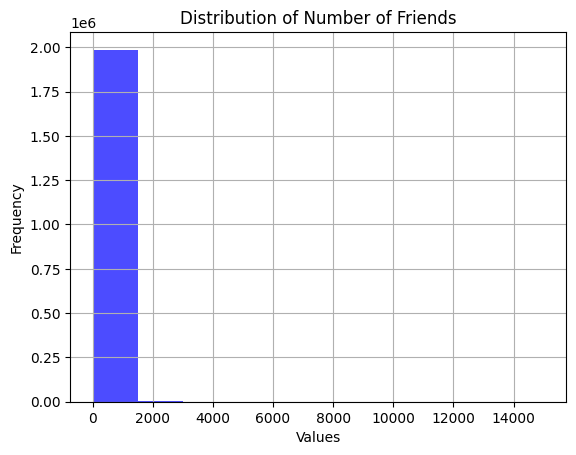

In [32]:
plt.hist(user_df['friend_count'], color='blue', alpha=0.7)
plt.title('Distribution of Number of Friends')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
Q1 = user_df['friend_count'].quantile(0.25)
Q3 = user_df['friend_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

user_df['Outlier'] = (user_df['friend_count'] < lower_bound) | (user_df['friend_count'] > upper_bound)

print(user_df['Outlier'].value_counts())


Outlier
False    1709895
True      277948
Name: count, dtype: int64


### #3. Review

In [34]:
# We only need the review_id, business_id, user_id, stars from the review
review_df = review_df[["review_id", "business_id", "user_id", "stars"]]
print(review_df.shape)
review_df.head()

(6990280, 4)


,review_id,business_id,user_id,stars
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5.0
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0


In [35]:
# How many reviews in the review_df contains business with business_id not in the business_df, user with user_id not in user_df, and missing both

business_not_in_business_df = review_df[~review_df['business_id'].isin(business_df['business_id'])]
user_not_in_user_df = review_df[~review_df['user_id'].isin(user_df['user_id'])]
both_missing = business_not_in_business_df[business_not_in_business_df['user_id'].isin(user_df['user_id'])]

print(f'Reviews with business_id not in business_df: {business_not_in_business_df.shape[0]}')
print(f'Reviews with user_id not in user_df: {user_not_in_user_df.shape[0]}')
print(f'Reviews with both missing: {both_missing.shape[0]}')


Reviews with business_id not in business_df: 0
Reviews with user_id not in user_df: 88
Reviews with both missing: 0


In [36]:
# Only keep the rows whose businees_id is in the restaurant_df and user_id is in the user_df

_before = review_df.shape[0]
print(f"Before filtering: {review_df.shape}")
review_df = review_df[review_df['business_id'].isin(restaurant_df['business_id'])]
review_df = review_df[review_df['user_id'].isin(user_df['user_id'])]
print(f"After filtering: {review_df.shape}")
print(f"Percentage of data lost: {(_before - review_df.shape[0])/_before}")

Before filtering: (6990280, 4)
After filtering: (5230747, 4)
Percentage of data lost: 0.2517113763683286


## III. Feature Engineering

### #1. Restaurant

#### Keep the ones in review

In [37]:
# prompt: Only keep the restaurant in restaurant_df whose business_id is in review_df

_before = restaurant_df.shape[0]
print(f"Before filtering: {restaurant_df.shape}")
restaurant_df = restaurant_df[restaurant_df["business_id"].isin(review_df["business_id"])]
print(f"After filtering: {restaurant_df.shape}")
print(f"Percentage of data lost: {(_before - restaurant_df.shape[0])/_before}")

restaurant_df.head()


Before filtering: (67070, 14)
After filtering: (67070, 14)
Percentage of data lost: 0.0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


#### One-hot encoding on the restaurant category

In [38]:
# Perform one-hot encoding to the categories
def encode_food_categories(restaurant_df, food_categories):
    # 1. Update the categories to only contain the food_categories
    def _keep_food_categories(x, food_categories):
        categories = x.split(", ")
        updated_categories = [c for c in categories if c in food_categories]
        return ", ".join(updated_categories)

    restaurant_df["food_categories"] = restaurant_df["categories"].apply(
        lambda x: _keep_food_categories(x, food_categories)
    )

    # 2. One-hot encoding
    categories = restaurant_df["food_categories"].str.get_dummies(sep=", ")

    return categories

#### Handle attribute features

Remember:

As we see from the results, the attributes column is quite complicated. Some attributes are key-value pair data. Nonetheless, we can ignore the attributes that just a small portion of restaurants have (e.g., only 0.12% of restaurants have the `AcceptsInsurance` attribute). After removing such attributes, we have:

- **True/False Attributes** (these are the attributes can later be represent as 0/1):
  
  [
    `Caters`, `RestaurantsReservations`, `BikeParking`, `HasTV`, `RestaurantsTakeOut`, `BusinessAcceptsCreditCards`, `GoodForKids`, `RestaurantsDelivery`, `RestaurantsGoodForGroups`, `OutdoorSeating`
  ]

- **Ordinal Attributes** (these are the attributes having a natural order or ranking, which we can applied ordinal encoding in the feature engineering step)

  [
    `WiFi`, `RestaurantsPriceRange2`, `NoiseLevel`, `Alcohol`
  ]

- **The `GoodForMeal` Attribute**: this attribute describes which meal the restaurant is good for dining.
  - This includes ['dessert', 'latenight', 'lunch', 'dinner', 'brunch', 'breakfast']
  - However, it seems that most of the restaurants having the attribute are marked as all `False`. This attribute might not be a valid feature.

- **The `BusinessParking` Attribute**: this attribute the different parking options that the restaurant is marked to provide.
  - This includes ['garage', 'street', 'validated', 'lot', 'valet']
  - One naive method to encode this attribute is to construct a new 1/0 column for each of the parking option above.
  - Another feature engineering method that our team is thinking about is to construct a scoring function for this attribute, whereas more parking options the restaurant provides, the hight the score would be. This method requires future validation through model training and evaluation.

- **The `Ambience` Attribute**: this attribute contains some key-value pairs that describe what the restaurant "feels like".
  - This includes ['touristy', 'hipster', 'romantic', 'divey', 'intimate', 'trendy', 'upscale', 'classy', 'casual']
  - One naive encoding method is to construct a new 1/0 column for each of the aspect above.
  - Engineering this attribute requires further analysis of their individual distribution and the correlation of each aspect to the rating.


Above is a brief vision for what we can do with those attributes in the feature engineering step. Next, we can take a look at some attributes and see how the ratings differs given different values of the attribute.

In [39]:
# Initialize the attributes features
attributes = restaurant_df.copy()
attributes = attributes[["attributes"]]
print(attributes.shape)

(67070, 1)


##### One-hot encoding for the true/false attributes

In [40]:
# One-hot encoding for the true/false attributes
true_false_attributes = [
    "Caters",
    "RestaurantsReservations",
    "BikeParking",
    "HasTV",
    "RestaurantsTakeOut",
    "BusinessAcceptsCreditCards",
    "GoodForKids",
    "RestaurantsDelivery",
    "RestaurantsGoodForGroups",
    "OutdoorSeating",
]


def encode_true_false_attributes(df, attribute_list):
    def _encode_true_false(x):
        if x == "True":
            return 1
        else:
            return 0

    def encode_true_false_attribute(df, attribute):
        df[attribute] = df["attributes"].apply(
            lambda x: x[attribute] if x is not None and attribute in x else None
        )
        df[attribute] = df[attribute].apply(_encode_true_false)
        return df

    for attribute in attribute_list:
        df = encode_true_false_attribute(df, attribute)

    return df

##### Scoring functions for ordinal attributes

WiFi

In [41]:
# Encode the WiFi attribute
def encode_WiFi(df):
    def _encode_WiFi(x):
        if x == "'no'" or x == "no" or x is None:
            return 0
        if x == "'free'" or x == "u'free'":
            return 2
        if x == "'paid'" or x == "u'paid'":
            return 1
        else:
            return 0

    df["WiFi"] = df["attributes"].apply(
        lambda x: x["WiFi"] if x is not None and "WiFi" in x else None
    )
    df["WiFi"] = df["WiFi"].apply(_encode_WiFi)
    return df


RestaurantsPriceRange2

In [42]:
# Encode the RestaurantsPriceRange2 attribute
def encode_RestaurantsPriceRange2(df):
    def _encode_RestaurantsPriceRange2(x):
        if x is None or x == "None":
            return 0
        return int(x)

    df["RestaurantsPriceRange2"] = df["attributes"].apply(
        lambda x: (
            x["RestaurantsPriceRange2"]
            if x is not None and "RestaurantsPriceRange2" in x
            else None
        )
    )
    df["RestaurantsPriceRange2"] = df["RestaurantsPriceRange2"].apply(
        _encode_RestaurantsPriceRange2
    )
    return df


NoiseLevel

In [43]:
# Encode the NoiseLevel attribute
def encode_NoiseLevel(df):
    def _encode_NoiseLevel(x):
        if x == "'very_loud'" or x == "u'very_loud'":
            return 0
        elif x == "'loud'" or x == "u'loud'":
            return 1
        elif x is None or x == "None" or x == "'average'" or x == "u'average'":
            return 2
        elif x == "'quiet'" or x == "u'quiet'":
            return 3

    df["NoiseLevel"] = df["attributes"].apply(
        lambda x: x["NoiseLevel"] if x is not None and "NoiseLevel" in x else None
    )
    df["NoiseLevel"] = df["NoiseLevel"].apply(_encode_NoiseLevel)
    return df


Alcohol

In [44]:
# Encode the NoiseLevel attribute
def encode_Alcohol(df):
    def _encode_Alcohol(x):
        if x is None or x == "None" or x == "u'none'" or x == "'none'":
            return 0
        elif x == "'beer_and_wine'" or x == "u'beer_and_wine'":
            return 1
        elif x == "'full_bar'" or x == "u'full_bar'":
            return 2
        return 0

    df["Alcohol"] = df["attributes"].apply(
        lambda x: x["Alcohol"] if x is not None and "Alcohol" in x else None
    )
    df["Alcohol"] = df["Alcohol"].apply(_encode_Alcohol)
    return df


#### More complex attributes

##### GoodForMeal

- **The `GoodForMeal` Attribute**: this attribute describes which meal the restaurant is good for dining.
  - This includes ['dessert', 'latenight', 'lunch', 'dinner', 'brunch', 'breakfast']
  - However, it seems that most of the restaurants having the attribute are marked as all `False`. This attribute might not be a valid feature.

In [45]:
restaurant_df_wifi = examine_attribute("GoodForMeal")
print()


GoodForMeal
Number of restaurants with GoodForMeal: 29079
Percentage of restaurants with GoodForMeal: 43.36%

GoodForMeal
{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}     9076
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}       4499
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}      2394
{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}      1355
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}         768
                                                                                                                 ... 
{u'breakfast': True, u'brunch': True, u'lunch': None, u'dinner': None, u'latenight': False, u'dessert': None}       1
{'dessert': None, 'latenight': False, 'lunch': True,

##### BusinessParking & Ambience

- **The `BusinessParking` Attribute**: this attribute the different parking options that the restaurant is marked to provide.
  - This includes ['garage', 'street', 'validated', 'lot', 'valet']
  - One naive method to encode this attribute is to construct a new 1/0 column for each of the parking option above.
  - Another feature engineering method that our team is thinking about is to construct a scoring function for this attribute, whereas more parking options the restaurant provides, the hight the score would be. This method requires future validation through model training and evaluation.

- **The `Ambience` Attribute**: this attribute contains some key-value pairs that describe what the restaurant "feels like".
  - This includes ['touristy', 'hipster', 'romantic', 'divey', 'intimate', 'trendy', 'upscale', 'classy', 'casual']
  - One naive encoding method is to construct a new 1/0 column for each of the aspect above.
  - Engineering this attribute requires further analysis of their individual distribution and the correlation of each aspect to the rating.

In [46]:
import ast


def onehot_encode_sub_attribute(attributes, attribute, subattributes):
    # Helper function for one-hot encoding
    def _encode_true_false(x):
        if x == True:
            return 1
        else:
            return 0

    # Helper function for encoding the attribute
    def _encode_subattribute(subattribute):
        attributes[subattribute] = attributes[attribute].apply(
            lambda x: (
                None
                if x is None
                or x == "None"
                or x == "u'None'"
                or x == "None"
                or subattribute not in x
                else x[subattribute]
            )
        )
        attributes[subattribute] = attributes[subattribute].apply(_encode_true_false)
        return attributes

    # Convert the attribute to a dictionary
    attributes[attribute] = attributes["attributes"].apply(
        lambda x: (
            ast.literal_eval(x[attribute]) if x is not None and attribute in x else None
        )
    )

    # One-hot encoding for each of the attributes
    for subattribute in subattributes:
        attributes = _encode_subattribute(subattribute)

    # Remove the attribute
    attributes = attributes.drop(columns=[attribute])

    return attributes

In [47]:
# attributes = onehot_encode_sub_attribute(
#     attributes, "BusinessParking", ["garage", "street", "lot", "valet"]
# )

# print(attributes.shape)
# attributes.head()

In [48]:
# attributes = onehot_encode_sub_attribute(
#     attributes,
#     "Ambience",
#     [
#         "touristy",
#         "hipster",
#         "romantic",
#         "divey",
#         "intimate",
#         "trendy",
#         "upscale",
#         "classy",
#         "casual",
#     ],
# )

# print(attributes.shape)
# attributes.head()

#### Combine All

In [49]:
print(restaurant_df.shape)
restaurant_df.head()

(67070, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [50]:
# --------------------------------------------------------
# 1. Food category
food_categories = [
    'Restaurants',
    'Food',
    'Bars',
    'Sandwiches',
    'American (Traditional)',
    'Pizza',
    'Coffee & Tea',
    'Fast Food',
    'Breakfast & Brunch',
    'American (New)',
    'Burgers',
    'Mexican',
    'Italian',
    'Specialty Food',
    'Seafood',
    'Chinese',
    'Bakeries',
    'Salad',
    'Chicken Wings',
    'Cafes',
    'Ice Cream & Frozen Yogurt',
    'Caterers',
    'Beer',
    'Wine & Spirits',
    'Delis',
    'Japanese',
    'Pubs',
    'Cocktail Bars',
    'Sushi Bars',
    'Barbeque',
    'Juice Bars & Smoothies',
    'Asian Fusion',
    'Diners',
]

restaurant_categories = encode_food_categories(restaurant_df, food_categories)
print(restaurant_categories.shape)


# --------------------------------------------------------
# 2. Attributes
restaurant_attributes = restaurant_df.copy()
restaurant_attributes = restaurant_attributes[["attributes"]]
print(restaurant_attributes.shape)

# 2.1 One-hot encoding for the true/false attributes
true_false_attributes = [
    "Caters",
    "RestaurantsReservations",
    "BikeParking",
    "HasTV",
    "RestaurantsTakeOut",
    "BusinessAcceptsCreditCards",
    "GoodForKids",
    "RestaurantsDelivery",
    "RestaurantsGoodForGroups",
    "OutdoorSeating",
]

restaurant_attributes = encode_true_false_attributes(restaurant_attributes, true_false_attributes)

# 2.2 WiFi
restaurant_attributes = encode_WiFi(restaurant_attributes)

# 2.3 RestaurantsPriceRange2
restaurant_attributes = encode_RestaurantsPriceRange2(restaurant_attributes)

# 2.4 NoiseLevel
restaurant_attributes = encode_NoiseLevel(restaurant_attributes)

# 2.5 Alcohol
restaurant_attributes = encode_Alcohol(restaurant_attributes)

# 2.6 BusinessParking
restaurant_attributes = onehot_encode_sub_attribute(
    restaurant_attributes, "BusinessParking", ["garage", "street", "lot", "valet"]
)

# 2.7 Ambience
restaurant_attributes = onehot_encode_sub_attribute(
    restaurant_attributes,
    "Ambience",
    [
        "touristy",
        "hipster",
        "romantic",
        "divey",
        "intimate",
        "trendy",
        "upscale",
        "classy",
        "casual",
    ],
)
print(restaurant_attributes.shape)


# --------------------------------------------------------
# 3. Additional features from the restaurant_df
restaurant_features = restaurant_df[["business_id", "stars", "review_count", "is_open"]]


# --------------------------------------------------------
# 4. Combine the categories and attributes table to produce the final feature table
restaurant_features = restaurant_features.merge(restaurant_categories, left_index=True, right_index=True)
restaurant_features = restaurant_features.merge(restaurant_attributes, left_index=True, right_index=True)
restaurant_features.drop(columns=["attributes"], inplace=True)


# --------------------------------------------------------
# 5. label
restaurant_features["stars"] = restaurant_df["stars"]

print(restaurant_features.shape)
restaurant_features.head()

(67070, 33)
(67070, 1)
(67070, 28)
(67070, 64)


,business_id,stars,review_count,is_open,American (New),American (Traditional),Asian Fusion,Bakeries,Barbeque,Bars,...,valet,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
3,MTSW4McQd7CbVtyjqoe9mw,4.0,80,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,4.5,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CF33F8-E6oudUQ46HnavjQ,2.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,k0hlBqXX-Bt0vf1op7Jr1w,3.0,19,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Save the train_df as the restaurant.csv
restaurant_features.to_csv(
    os.path.join(FEATURE_PATH, "restaurant_features.csv"), index=False
)

### #2. User

#### Keep the ones in review

In [52]:
print(user_df.shape)
user_df.head()

(1987843, 29)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_funny,compliment_writer,compliment_photos,year,age,elite_years,elite_year_count,friend_list,friend_count,Outlier
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,467,239,180,2007,15,[2007],1,"[NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8...",14995,True
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,3131,1521,1946,2009,13,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",14,"[ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU...",4646,True
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,119,35,18,2008,14,"[2009, 2010, 2011, 2012, 2013]",5,"[LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQg...",381,True
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,26,10,9,2005,17,"[2009, 2010, 2011]",3,"[enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74...",131,True
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,2007,15,[],0,"[PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYM...",27,False


In [53]:
# Calculate the number of user in the user_df who does not appears in the review_df

user_not_in_review_df = user_df[~user_df['user_id'].isin(review_df['user_id'])]
print(f'Users not in review_df: {user_not_in_review_df.shape[0]}')
print(f'Percentage of users not in review_df: {user_not_in_review_df.shape[0] / user_df.shape[0] * 100:.2f}%')


Users not in review_df: 463070
Percentage of users not in review_df: 23.30%


In [54]:
# Remove the user in the user_df who does not appears in the review_df

_before = user_df.shape[0]
print(f'Before: {_before}')
user_df = user_df[user_df['user_id'].isin(review_df['user_id'])]
_after = user_df.shape[0]
print(f'After: {_after}')

print(user_df.shape)
user_df.head()


Before: 1987843
After: 1524773
(1524773, 29)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_funny,compliment_writer,compliment_photos,year,age,elite_years,elite_year_count,friend_list,friend_count,Outlier
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,467,239,180,2007,15,[2007],1,"[NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8...",14995,True
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,3131,1521,1946,2009,13,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",14,"[ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU...",4646,True
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,119,35,18,2008,14,"[2009, 2010, 2011, 2012, 2013]",5,"[LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQg...",381,True
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,26,10,9,2005,17,"[2009, 2010, 2011]",3,"[enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74...",131,True
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,2007,15,[],0,"[PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYM...",27,False


#### Scaling the numerical features

In [55]:
user_features = user_df[["user_id"]]

print(user_features.shape)
user_features.head()

(1524773, 1)


,user_id
0,qVc8ODYU5SZjKXVBgXdI7w
1,j14WgRoU_-2ZE1aw1dXrJg
2,2WnXYQFK0hXEoTxPtV2zvg
3,SZDeASXq7o05mMNLshsdIA
4,hA5lMy-EnncsH4JoR-hFGQ


In [56]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
columns_to_rescale = ['review_count','useful','funny','cool','fans','elite_year_count','compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos']

In [57]:
user_features['rescaled_friend_count'] = transformer.fit_transform(user_df[['friend_count']])

user_features.head()

,user_id,rescaled_friend_count
0,qVc8ODYU5SZjKXVBgXdI7w,1.967915
1,j14WgRoU_-2ZE1aw1dXrJg,1.888646
2,2WnXYQFK0hXEoTxPtV2zvg,1.576270
3,SZDeASXq7o05mMNLshsdIA,1.345259
4,hA5lMy-EnncsH4JoR-hFGQ,0.828239


In [58]:
user_features[columns_to_rescale] = transformer.fit_transform(user_df[columns_to_rescale])

print(user_features.shape)
user_features.head()

(1524773, 19)


,user_id,rescaled_friend_count,review_count,useful,funny,cool,fans,elite_year_count,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,1.967915,2.207977,2.400163,1.945863,1.983425,2.042883,4.084629,3.163072,3.233740,5.084455,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108
1,j14WgRoU_-2ZE1aw1dXrJg,1.888646,2.590141,2.555146,1.960071,1.990678,2.042884,4.085952,3.163072,3.233740,5.084455,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108
2,2WnXYQFK0hXEoTxPtV2zvg,1.576270,2.239748,2.242065,1.942885,1.958685,2.042804,4.085952,3.163072,3.233740,5.084455,6.360992,9.733196,2.226066,2.174200,2.533541,2.533541,2.769632,3.512108
3,SZDeASXq7o05mMNLshsdIA,1.345259,1.928087,1.990645,1.917938,1.916671,2.042494,4.085951,3.163072,3.233739,5.084455,6.360992,9.733196,2.225918,2.173949,2.533539,2.533539,2.769631,3.512108
4,hA5lMy-EnncsH4JoR-hFGQ,0.828239,1.522066,1.098481,1.569003,1.213122,1.619672,-0.244754,3.138299,3.231425,-0.196678,-0.157208,-0.102741,2.035696,1.897969,-0.405828,-0.405828,-0.364237,-0.284894


#### Add additional features

In [59]:
user_features[['age', 'average_stars']] = user_df[['age', 'average_stars']]

print(user_features.shape)
user_features.head()

(1524773, 21)


,user_id,rescaled_friend_count,review_count,useful,funny,cool,fans,elite_year_count,compliment_hot,compliment_more,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,age,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,1.967915,2.207977,2.400163,1.945863,1.983425,2.042883,4.084629,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,15,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,1.888646,2.590141,2.555146,1.960071,1.990678,2.042884,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,13,3.74
2,2WnXYQFK0hXEoTxPtV2zvg,1.576270,2.239748,2.242065,1.942885,1.958685,2.042804,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174200,2.533541,2.533541,2.769632,3.512108,14,3.32
3,SZDeASXq7o05mMNLshsdIA,1.345259,1.928087,1.990645,1.917938,1.916671,2.042494,4.085951,3.163072,3.233739,...,6.360992,9.733196,2.225918,2.173949,2.533539,2.533539,2.769631,3.512108,17,4.27
4,hA5lMy-EnncsH4JoR-hFGQ,0.828239,1.522066,1.098481,1.569003,1.213122,1.619672,-0.244754,3.138299,3.231425,...,-0.157208,-0.102741,2.035696,1.897969,-0.405828,-0.405828,-0.364237,-0.284894,15,3.54


In [60]:
user_features.to_csv(os.path.join(FEATURE_PATH, "user_features.csv"), index=False)

### #3. Review

In [61]:
review_df.to_csv(os.path.join(FEATURE_PATH, 'review_df.csv'), index=False)

### #4. Re-index the Ids

In [62]:
# restaurant_features.to_csv('restaurant_features.csv')
# restaurant_features = pd.read_csv('restaurant_features.csv')
restaurant_features = pd.read_csv(os.path.join(FEATURE_PATH, 'restaurant_features.csv'))

restaurant_features.head()

,business_id,stars,review_count,is_open,American (New),American (Traditional),Asian Fusion,Bakeries,Barbeque,Bars,...,valet,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,MTSW4McQd7CbVtyjqoe9mw,4.0,80,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,4.5,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,2.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k0hlBqXX-Bt0vf1op7Jr1w,3.0,19,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Create a mapping between the business_id and a set of integers
business_id_to_index = dict(
    zip(restaurant_features["business_id"], list(restaurant_features.index))
)

# Save it as a json
# with open("business_id_to_index.json", "w") as f:
#     json.dump(business_id_to_index, f)

restaurant_features["business_id"] = restaurant_features["business_id"].map(
    business_id_to_index
)
restaurant_features.to_csv(
    os.path.join(TRANSFORMED_FEATURE_PATH, "transformed_restaurant_features.csv"),
    index=False,
)

restaurant_features.head()

,business_id,stars,review_count,is_open,American (New),American (Traditional),Asian Fusion,Bakeries,Barbeque,Bars,...,valet,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,0,4.0,80,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.5,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,19,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1.5,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# user_features.to_csv('user_features.csv')
# user_features = pd.read_csv('user_features.csv')
user_features = pd.read_csv(os.path.join(FEATURE_PATH, 'user_features.csv'))

user_features

,user_id,rescaled_friend_count,review_count,useful,funny,cool,fans,elite_year_count,compliment_hot,compliment_more,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,age,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,1.967915,2.207977,2.400163,1.945863,1.983425,2.042883,4.084629,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,15,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,1.888646,2.590141,2.555146,1.960071,1.990678,2.042884,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,13,3.74
2,2WnXYQFK0hXEoTxPtV2zvg,1.576270,2.239748,2.242065,1.942885,1.958685,2.042804,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174200,2.533541,2.533541,2.769632,3.512108,14,3.32
3,SZDeASXq7o05mMNLshsdIA,1.345259,1.928087,1.990645,1.917938,1.916671,2.042494,4.085951,3.163072,3.233739,...,6.360992,9.733196,2.225918,2.173949,2.533539,2.533539,2.769631,3.512108,17,4.27
4,hA5lMy-EnncsH4JoR-hFGQ,0.828239,1.522066,1.098481,1.569003,1.213122,1.619672,-0.244754,3.138299,3.231425,...,-0.157208,-0.102741,2.035696,1.897969,-0.405828,-0.405828,-0.364237,-0.284894,15,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524768,fB3jbHi3m0L2KgGOxBv6uw,-0.937659,0.863157,0.401666,-0.886517,-0.929263,-0.547551,-0.244754,-0.317273,-0.309371,...,-0.157208,-0.102741,-0.470684,-0.492800,-0.405828,-0.405828,-0.364237,-0.284894,7,4.92
1524769,68czcr4BxJyMQ9cJBm6C7Q,-0.937659,-1.522760,-1.307534,-0.886517,-0.929263,-0.547551,-0.244754,-0.317273,-0.309371,...,-0.157208,-0.102741,-0.470684,-0.492800,-0.405828,-0.405828,-0.364237,-0.284894,6,5.00
1524770,1x3KMskYxOuJCjRz70xOqQ,-0.937659,-0.434716,-0.633852,0.225184,-0.929263,-0.547551,-0.244754,-0.317273,-0.309371,...,-0.157208,-0.102741,-0.470684,-0.492800,-0.405828,-0.405828,-0.364237,-0.284894,5,2.00
1524771,ulfGl4tdbrH05xKzh5lnog,-0.937659,-1.004820,-1.307534,-0.886517,-0.929263,-0.547551,-0.244754,-0.317273,-0.309371,...,-0.157208,-0.102741,-0.470684,-0.492800,-0.405828,-0.405828,-0.364237,-0.284894,11,3.00


In [65]:
# Create a mapping between the user_id and a set of integers
user_id_to_index = dict(zip(user_features["user_id"], list(user_features.index)))

# Save it as a json
# with open("user_id_to_index.json", "w") as f:
#     json.dump(user_id_to_index, f)


user_features["user_id"] = user_features["user_id"].map(user_id_to_index)
user_features.to_csv(
    os.path.join(TRANSFORMED_FEATURE_PATH, "transformed_user_features.csv"), index=False
)

user_features.head()

,user_id,rescaled_friend_count,review_count,useful,funny,cool,fans,elite_year_count,compliment_hot,compliment_more,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,age,average_stars
0,0,1.967915,2.207977,2.400163,1.945863,1.983425,2.042883,4.084629,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,15,3.91
1,1,1.888646,2.590141,2.555146,1.960071,1.990678,2.042884,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174201,2.533541,2.533541,2.769632,3.512108,13,3.74
2,2,1.576270,2.239748,2.242065,1.942885,1.958685,2.042804,4.085952,3.163072,3.233740,...,6.360992,9.733196,2.226066,2.174200,2.533541,2.533541,2.769632,3.512108,14,3.32
3,3,1.345259,1.928087,1.990645,1.917938,1.916671,2.042494,4.085951,3.163072,3.233739,...,6.360992,9.733196,2.225918,2.173949,2.533539,2.533539,2.769631,3.512108,17,4.27
4,4,0.828239,1.522066,1.098481,1.569003,1.213122,1.619672,-0.244754,3.138299,3.231425,...,-0.157208,-0.102741,2.035696,1.897969,-0.405828,-0.405828,-0.364237,-0.284894,15,3.54


In [66]:
# review_df.to_csv('review_df.csv')
# review_df = pd.read_csv('review_df.csv')
review_df = pd.read_csv(os.path.join(FEATURE_PATH, 'review_df.csv'))

review_df

,review_id,business_id,user_id,stars
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,eUta8W_HdHMXPzLBBZhL1A,1.0
...,...,...,...,...
5230742,7NgXAuTFiJHYbuepOPwU0w,1_BVWDzi5cVqWxNe9bOMMQ,x1QLCwZGFAjxRRw4EHc3-g,5.0
5230743,wD5ZWao_vjyT2h4xmGam8Q,e_E-jq9mwm7wk75k7Yi-Xw,7L7GL5Pi2cf8mbm2Dpw4zw,5.0
5230744,YVX1Wsa4LYxjvFwuHBb_gA,X4mouE_cMiwbfyCPZ_K-FA,RKPkxOYQlM0BjhM-H6_vAw,4.0
5230745,i-I4ZOhoX70Nw5H0FwrQUA,Rr9kKArrMhSLVE9a53q-aA,YwAMC-jvZ1fvEUum6QkEkw,5.0


In [67]:
# Create a mapping between the review_id and a set of integers
review_id_to_index = dict(zip(review_df["review_id"], list(review_df.index)))

# Save it as a json
# with open("review_id_to_index.json", "w") as f:
#     json.dump(review_id_to_index, f)


review_df["review_id"] = review_df["review_id"].map(review_id_to_index)
review_df["user_id"] = review_df["user_id"].map(user_id_to_index)
review_df["business_id"] = review_df["business_id"].map(business_id_to_index)

review_df.to_csv(
    os.path.join(TRANSFORMED_FEATURE_PATH, "transformed_review_df.csv"), index=False
)

review_df.head()

,review_id,business_id,user_id,stars
0,0,819,117176,3.0
1,1,5888,92882,3.0
2,2,2842,153361,5.0
3,3,2733,140699,4.0
4,4,1222,124775,1.0


In [68]:
# Randomly sample 10% of the review from review_df
review_df_sample = review_df.sample(frac=0.1, random_state=42)
review_df_sample.to_csv(
    os.path.join(TRANSFORMED_FEATURE_PATH, "review_df_sample.csv"), index=False
)

print(review_df_sample.shape)
review_df_sample.head()

(523075, 4)


,review_id,business_id,user_id,stars
4192466,4192466,59659,151344,3.0
3652485,3652485,51361,29944,4.0
4897699,4897699,61502,261703,5.0
281628,281628,6634,343258,5.0
720614,720614,8229,4952,2.0
